<a href="https://colab.research.google.com/github/ManavGuru/Portfolio/blob/master/CSCE633_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HOMEWORK 2

Total Number of Data Points in Training set: 100
Total Number of Data Points in Testing set: 35
------------------------------------------------------------
 1 ) Hour (Coded) 
------------------------------------------------------------


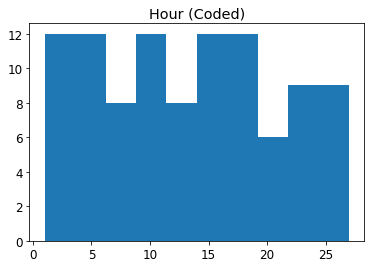

------------------------------------------------------------
 2 ) Immobilized bus 
------------------------------------------------------------


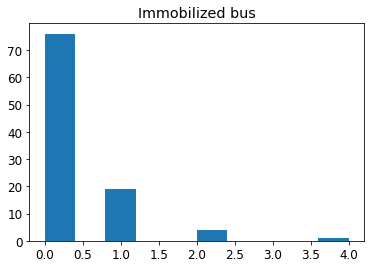

------------------------------------------------------------
 3 ) Broken Truck 
------------------------------------------------------------


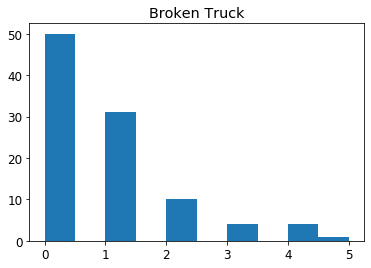

------------------------------------------------------------
 4 ) Vehicle excess 
------------------------------------------------------------


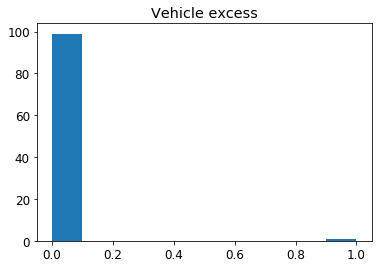

------------------------------------------------------------
 5 ) Accident victim 
------------------------------------------------------------


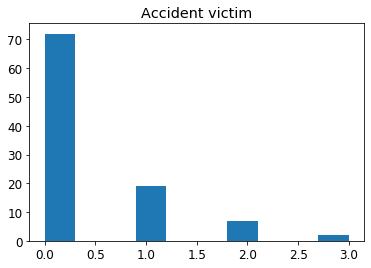

------------------------------------------------------------
 6 ) Running over 
------------------------------------------------------------


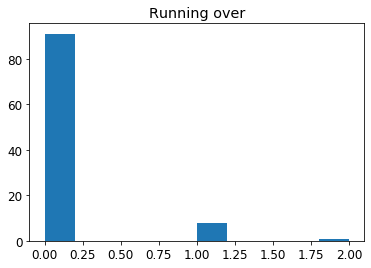

------------------------------------------------------------
 7 ) Fire vehicles 
------------------------------------------------------------


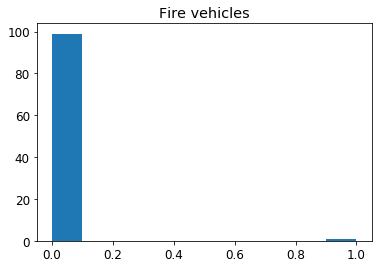

------------------------------------------------------------
 8 ) Occurrence involving freight 
------------------------------------------------------------


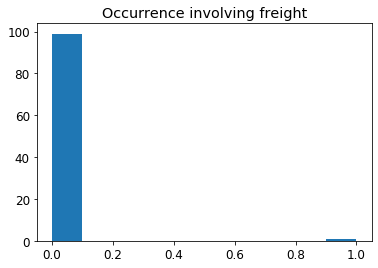

------------------------------------------------------------
 9 ) Incident involving dangerous freight 
------------------------------------------------------------


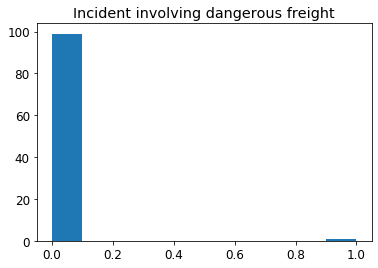

------------------------------------------------------------
 10 ) Lack of electricity 
------------------------------------------------------------


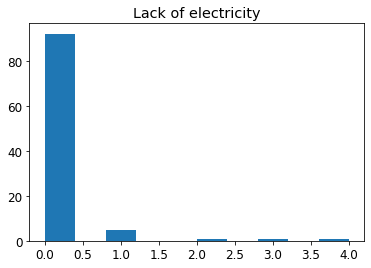

------------------------------------------------------------
 11 ) Fire 
------------------------------------------------------------


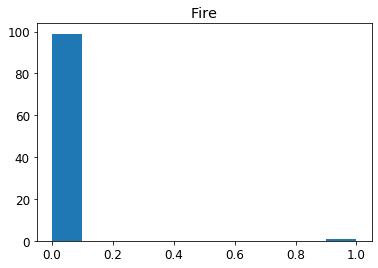

------------------------------------------------------------
 12 ) Point of flooding 
------------------------------------------------------------


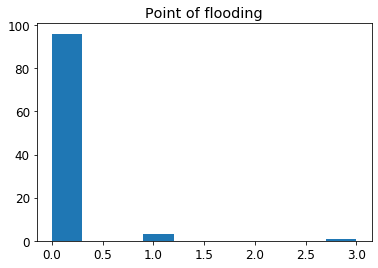

------------------------------------------------------------
 13 ) Manifestations 
------------------------------------------------------------


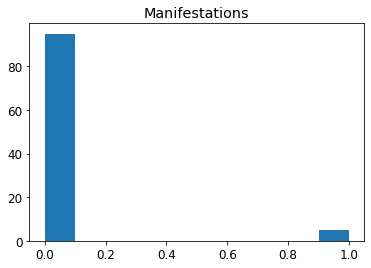

------------------------------------------------------------
 14 ) Defect in the network of trolleybuses 
------------------------------------------------------------


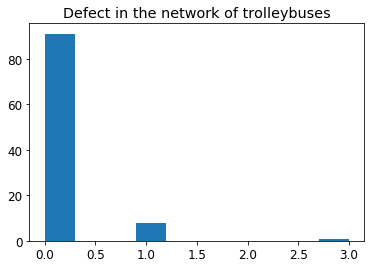

------------------------------------------------------------
 15 ) Tree on the road 
------------------------------------------------------------


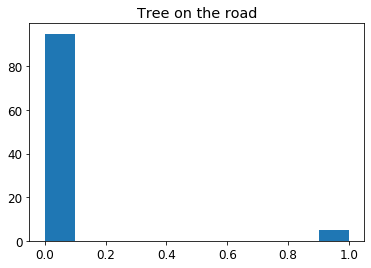

------------------------------------------------------------
 16 ) Semaphore off 
------------------------------------------------------------


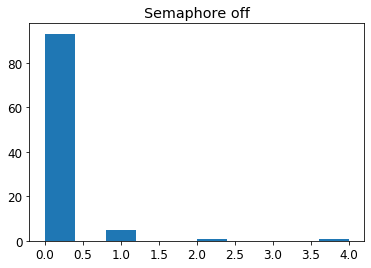

------------------------------------------------------------
 17 ) Intermittent Semaphore 
------------------------------------------------------------


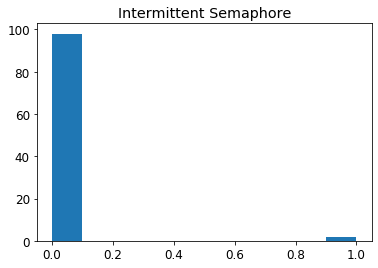

------------------------------------------------------------
 18 ) Slowness in traffic (%) 
------------------------------------------------------------


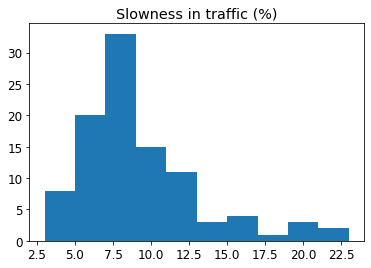

In [214]:
import csv
import math as m
import operator
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial import distance
from scipy import spatial
matplotlib.rcParams.update({'font.size': 12})
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from scipy.stats import pearsonr
from numpy import cov
#Creating a class for representing the Datapoints.

class Datapoint(object):
  
  def __init__ (self, feats):
      self.feature_1 = feats['Hour']
      self.feature_2 = feats['ImmobilizedBus']
      self.feature_3 = feats['BrokenTruck']
      self.feature_4 = feats['VehicleExcess']
      self.feature_5 = feats['AccidentVictim']
      self.feature_6 = feats['RunningOver']
      self.feature_7 = feats['FireVehicles']
      self.feature_8 = feats['OccurenceFreight']
      self.feature_9 = feats['DangerousFreight']
      self.feature_10 = feats['Electricity']
      self.feature_11 = feats['Fire']
      self.feature_12 = feats['PointFlooding']
      self.feature_13 = feats['Manifestations']
      self.feature_14 = feats['TrolleyBusNetwrokERR']
      self.feature_15 = feats['Tree']
      self.feature_16 = feats['SemaphoreOff']
      self.feature_17 = feats['IntermittentSemaphore']
      self.outcome = feats['Slowlness']
  #Returns the features as a Numpy Array. 
  def feature_vector (self):
      return np.array([self.feature_1, self.feature_2, self.feature_3,\
                       self.feature_4, self.feature_5, self.feature_6,\
                       self.feature_7, self.feature_8, self.feature_9, \
                       self.feature_10,self.feature_11,self.feature_12,\
                       self.feature_13,self.feature_14,self.feature_15,\
                       self.feature_16,self.feature_17,self.outcome])
  
  def __str__(self):
    return "\Hour:{}, \nImmobilized bus:{}, \nBroken Truck:{}, \nVehicle Excess:{},\
     \nAccident Victim:{}, \nRunning Over:{}, \nFire Vehicles:{}, \
     \nOccurence Involving Freight:{}, \nIncident Involving Dangerous Freight:{},\
      \nLack of Electricity:{}, \nFire:{}, \nPoint of flooding:{}, \nManifestations:{},\
       \nDefect in the network of trolleybusses:{}, \nTree on the road:{}, \nSemaphore off:{}\
       , \nIntermittent Semaphore:{}, \nSlowness in traffic:{} ".format(self.feature_1, self.feature_2, self.feature_3,\
                       self.feature_4, self.feature_5, self.feature_6,\
                       self.feature_7, self.feature_8, self.feature_9, \
                       self.feature_10,self.feature_11,self.feature_12,\
                       self.feature_13,self.feature_14,self.feature_15,\
                       self.feature_16,self.feature_17,self.outcome)
#Function that creates the datapoints and writes the corresponding feature value to the datapoints. 
def parse_dataset(filename):
    with open(filename) as csvfile: 
      dataset = []
      lineCount = 0
      readCSV = csv.reader(csvfile)
      for row in readCSV: 
        if(lineCount==0):
          a=Datapoint({'Hour':(row[0]), 'ImmobilizedBus':(row[1]), 'BrokenTruck':(row[2]), 'VehicleExcess':(row[3]), \
                        'AccidentVictim':(row[4]), 'RunningOver':(row[5]), 'FireVehicles':(row[6]), 'OccurenceFreight':(row[7]),\
                        'DangerousFreight':(row[8]),'Electricity':(row[9]),'Fire':(row[10]),'PointFlooding':(row[11]),\
                        'Manifestations':(row[12]), 'TrolleyBusNetwrokERR':(row[13]), 'Tree':(row[14]), 'SemaphoreOff':(row[15]), \
                        'IntermittentSemaphore':(row[16]),'Slowlness':(row[17])})
          feature_list.append(a.feature_vector())
          lineCount += 1
        else:
          a=Datapoint({'Hour':(row[0]), 'ImmobilizedBus':(row[1]), 'BrokenTruck':(row[2]), 'VehicleExcess':(row[3]), \
                        'AccidentVictim':(row[4]), 'RunningOver':(row[5]), 'FireVehicles':(row[6]), 'OccurenceFreight':(row[7]),\
                        'DangerousFreight':(row[8]),'Electricity':(row[9]),'Fire':(row[10]),'PointFlooding':(row[11]),\
                        'Manifestations':(row[12]), 'TrolleyBusNetwrokERR':(row[13]), 'Tree':(row[14]), 'SemaphoreOff':(row[15]), \
                        'IntermittentSemaphore':(row[16]),'Slowlness':(row[17])})
        
          dataset.append(a.feature_vector())
    
    
    return dataset

feature_list = []
#PARSE the training , development and testing  dataset.
dataset_train = parse_dataset('hw2__question1_train.csv')
dataset_test  = parse_dataset('hw2__question1_test.csv')

def convertInt (dataset): 
  result = []
  for data in dataset: 
    result.append(data.astype(int))
  return result

dataset_test = convertInt(dataset_test)
dataset_train = convertInt(dataset_train)

#Printing some statistics about the data.
print("Total Number of Data Points in Training set: {0}".format(len(dataset_train)))
print("Total Number of Data Points in Testing set: {0}".format(len(dataset_test)))

#print(dataset_train)
#Function to plot.
def plot_histogram(dataset): 
  i = 0
  for i in range (18):
    print ("------------------------------------------------------------\n\
",i+1,')',feature_list[0][i],"\n------------------------------------------------------------")
    plot_list = []
    for data in dataset: 
      plot_list.append(data[i])
    plt.title(feature_list[0][i])
    plt.hist(plot_list)
    plt.show()

plot_histogram(dataset_train)


['Hour (Coded)' 'Immobilized bus' 'Broken Truck' 'Vehicle excess'
 'Accident victim' 'Running over' 'Fire vehicles'
 'Occurrence involving freight' 'Incident involving dangerous freight'
 'Lack of electricity' 'Fire' 'Point of flooding' 'Manifestations'
 'Defect in the network of trolleybuses' 'Tree on the road'
 'Semaphore off' 'Intermittent Semaphore' 'Slowness in traffic (%)']


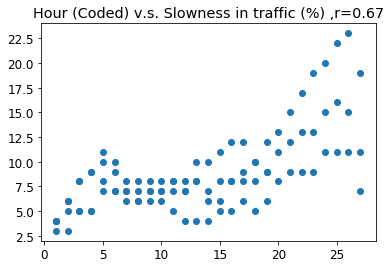

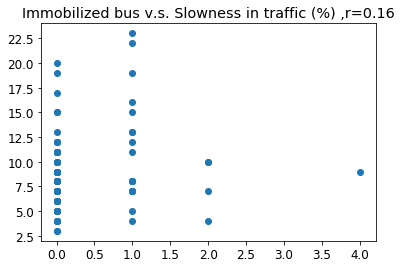

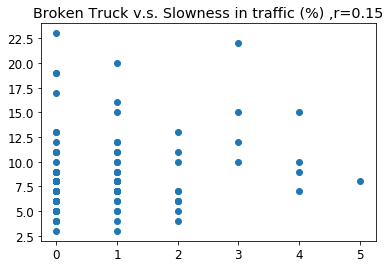

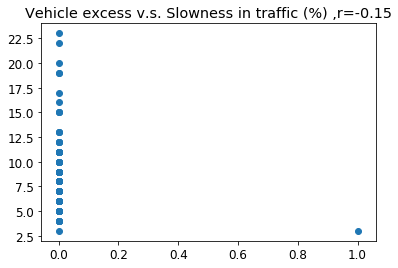

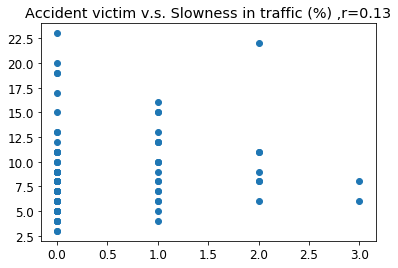

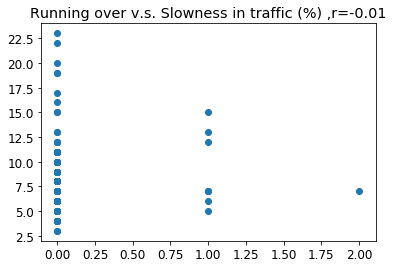

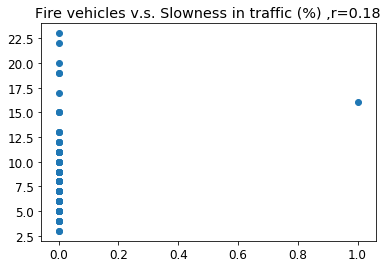

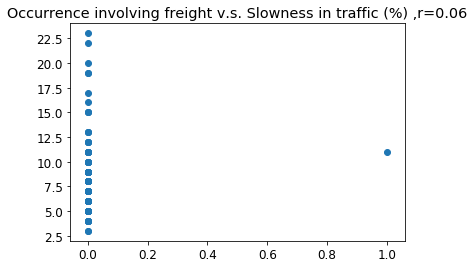

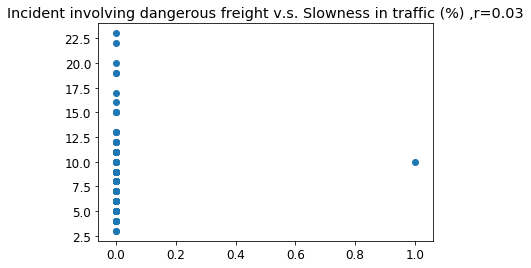

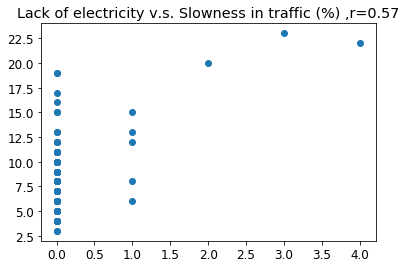

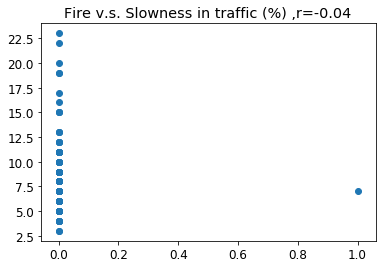

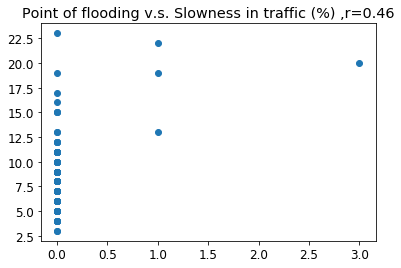

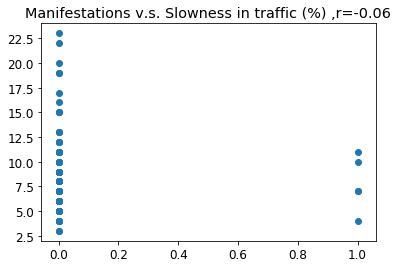

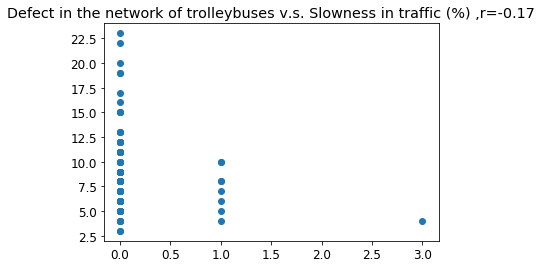

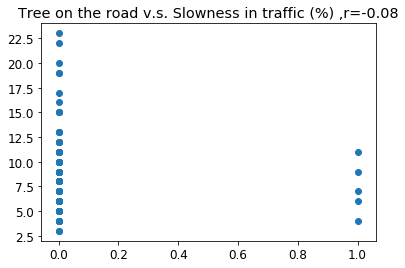

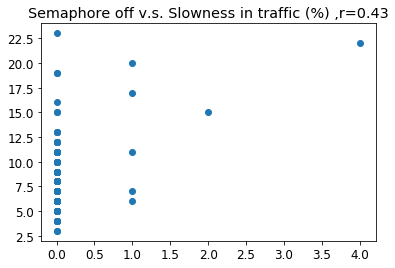

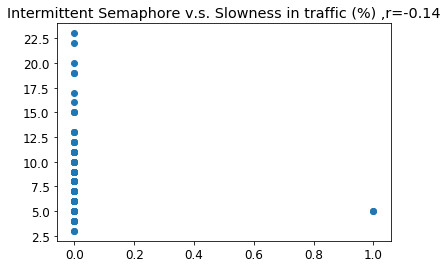

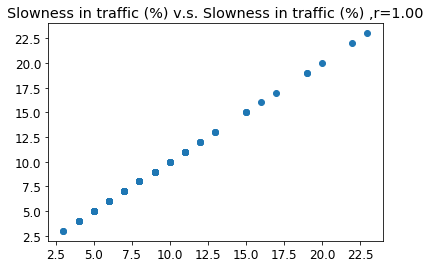

1.00,0.09,0.22,-0.16,0.19,0.04,0.16,0.02,-0.00,0.28,-0.04,0.23,-0.15,-0.18,-0.05,0.19,-0.18,0.67,
0.09,1.00,0.22,-0.05,-0.02,0.18,0.11,0.11,0.26,0.10,-0.05,0.01,0.17,0.10,0.03,0.05,0.04,0.16,
0.22,0.22,1.00,-0.08,0.40,0.15,0.01,0.10,0.10,0.11,0.01,0.08,0.03,0.11,-0.05,0.20,-0.04,0.15,
-0.16,-0.05,-0.08,1.00,-0.06,-0.03,-0.01,-0.01,-0.01,-0.02,-0.01,-0.02,-0.02,-0.03,-0.02,-0.02,-0.01,-0.15,
0.19,-0.02,0.40,-0.06,1.00,0.00,0.09,-0.06,0.09,0.11,-0.06,0.03,-0.06,0.06,-0.06,0.11,-0.08,0.13,
0.04,0.18,0.15,-0.03,0.00,1.00,-0.03,-0.03,-0.03,-0.02,-0.03,0.04,0.07,0.07,0.07,-0.07,0.17,-0.01,
0.16,0.11,0.01,-0.01,0.09,-0.03,1.00,-0.01,-0.01,-0.02,-0.01,-0.02,-0.02,-0.03,-0.02,-0.02,-0.01,0.18,
0.02,0.11,0.10,-0.01,-0.06,-0.03,-0.01,1.00,-0.01,-0.02,-0.01,-0.02,0.44,-0.03,-0.02,0.18,-0.01,0.06,
-0.00,0.26,0.10,-0.01,0.09,-0.03,-0.01,-0.01,1.00,-0.02,-0.01,-0.02,0.44,-0.03,-0.02,-0.02,-0.01,0.03,
0.28,0.10,0.11,-0.02,0.11,-0.02,-0.02,-0.02,-0.02,1.00,-0.02,0.53,-0.06,-0.07,-0.06,0.67,-0.04,0.57,


In [8]:
import pandas as pd

train_data = pd.read_csv("hw2__question1_train.csv")
test_data = pd.read_csv("hw2__question1_test.csv")

newX = train_data.drop('Slowness in traffic (%)',axis= 1)
newY = train_data['Slowness in traffic (%)']

newX_test = test_data.drop('Slowness in traffic (%)', axis= 1)

newY_test = test_data['Slowness in traffic (%)']

features_data = np.array(feature_list[0])
print (features_data)
dataset_test = np.array(dataset_test)
dataset_train = np.array(dataset_train)
trainT = dataset_train.T

for i in features_data:
  corr, p = pearsonr(train_data[i],newY)
  plt.scatter(train_data[i],newY)
  plt.title(i+' v.s.'+' Slowness in traffic (%) ,r='+str(format(corr,'.2f')))
  plt.show()

for i in features_data: 
  for j in features_data:
    corr, p = pearsonr(train_data[i],train_data[j])
    print(format(corr, '.2f'), end = ',')
  print()

In [120]:
#Creating an LR model using OLS Solution
dMtx = np.array(newX)
dMtx=np.append(np.ones([100,1]),dMtx,axis=1)
dMtx = dMtx.astype('int64')

Outcome = np.array(newY)


first = (dMtx.T.dot(dMtx))
first = np.linalg.inv(first)
second = (dMtx.T.dot(newY))
w_opt = first.dot(second)
print(w_opt) #this is the OLS model. 

#Now using this model on our TEST DATA and calculate Pearson's r and RSS.

dMtx_test = np.array(newX_test)
dMtx_test = np.append(np.ones([35,1]),dMtx_test,axis=1)
dMtx_test = dMtx_test.astype('int64')

test_outcome = np.array(newY_test)
RSS = 0

inner = dMtx_test.dot(w_opt)

first = (test_outcome-inner)
RSS = first.T.dot(first)

print('RSS ERROR=',RSS)

test_score, test_score_p = pearsonr(inner,test_outcome)
print("r=" + format(test_score, '.2f') + ", p=" + format(test_score_p, '.2f'))



[ 4.88163779  0.26349179  0.44771762 -0.14543905 -2.14512958 -0.03559434
 -0.29705992  4.26438321  0.74721543  0.38048825  2.09501546 -0.37111665
  1.81826542  0.74351787 -0.56926429 -0.59828605  0.51841252 -0.80646839]
RSS ERROR= 501.8642602243605
r=0.82, p=0.00


In [121]:
lr = LinearRegression()
lr.fit(newX,newY)
train_score, train_score_p = pearsonr(lr.predict(newX),newY)
print("\nr=" + format(train_score, '.2f') + ", p=" + format(train_score_p, '.2f'))

test_score, test_score_p = pearsonr(lr.predict(newX_test),newY_test)
print("r=" + format(test_score, '.2f') + ", p=" + format(test_score_p, '.2f'))


r=0.81, p=0.00
r=0.82, p=0.00


In [0]:
features_drop = ['Immobilized bus','Broken Truck', 'Running over', 'Occurrence\
 involving freight', 'Incident involving dangerous freight', 'Fire','Manifestations']
betterX = train_data.drop(features_drop,axis=1)
betterX_test = test_data.drop(features_drop,axis=1)

In [181]:
#Creating an LR model using OLS Solution
dMtx = np.array(betterX)
dMtx = np.append(np.ones([100,1]),dMtx,axis=1)
dMtx = dMtx.astype('int64')

Outcome = np.array(newY)

first = (dMtx.T.dot(dMtx))
first = np.linalg.inv(first)
second = (dMtx.T.dot(newY))
w_opt = first.dot(second)
# print(w_opt) #this is the OLS model. 

#Now using this model on our TEST DATA and calculate Pearson's r and RSS.

dMtx_test = np.array(betterX_test)
dMtx_test = np.append(np.ones([35,1]),dMtx_test,axis=1)
dMtx_test = dMtx_test.astype('int64')
test_outcome = np.array(newY_test)

RSS = 0
inner = dMtx_test.dot(w_opt)
first = (test_outcome-inner)
RSS = first.T.dot(first)

print('RSS ERROR=',RSS)
test_score, test_score_p = pearsonr(inner,test_outcome)
print("r=" + format(test_score, '.2f') + ", p=" + format(test_score_p, '.2f'))

RSS ERROR= 3.9611861494767887e-26
r=1.00, p=0.00


In [182]:
#using inbuilt functions just as to verify results.
print('\nUsing Scikit:')
lr = LinearRegression()
lr.fit(betterX,newY)

train_score, train_score_p = pearsonr(lr.predict(betterX),newY)
print("r=" + format(train_score, '.2f') + ", p=" + format(train_score_p, '.2f'))

test_score, test_score_p = pearsonr(lr.predict(betterX_test),newY_test)
print("r=" + format(test_score, '.2f') + ", p=" + format(test_score_p, '.2f'))


Using Scikit:
r=1.00, p=0.00
r=1.00, p=0.00


In [0]:
values = []

for i in newY:
  values.append(newY[i])
for i in newY_test: 
  values.append(newY_test[i])

summation = 0

for i in values: 
  summation += values[i]

mean = summation/len(values)

newNewY = []
for i in newY: 
  if (i>mean):
      newNewY.append(1)
  else: 
    newNewY.append(0)

newNewY_test = []
for i in newY_test: 
  if (i > mean):
      newNewY_test.append(1)
  else: 
    newNewY_test.append(0)


In [184]:
#logistic regression framework.
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

newX_scaled = preprocessing.scale(newX)

LRModel = LogisticRegression(random_state=0).fit(newX_scaled,newNewY)
LRModel.predict(newX_test)
LRModel.score(newX_test,newNewY_test)


0.8857142857142857

In [185]:
#logistic regression framework.
betterX_scaled = preprocessing.scale(betterX)

LRModel = LogisticRegression(penalty='none').fit(betterX_scaled,newNewY)
LRModel.predict(betterX_test)
LRModel.score(betterX_test,newNewY_test)

0.8857142857142857

In [213]:
from sklearn.model_selection import LeaveOneOut
hyper = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
loo = LeaveOneOut()
newX_scaled = np.array(newX_scaled)
newNewY = np.array(newNewY)
loo.get_n_splits(newX_scaled)
cross_val_accuracy = []
for h in hyper:
  E = []
  for train_index, test_index in loo.split(newX_scaled):
    cross_train = []
    cross_train = np.delete(newX_scaled, test_index, axis=0)
    cross_train_outcome = np.delete(newNewY, test_index)
    t = test_index.item
    LRModel = LogisticRegression(C=h).fit(cross_train,cross_train_outcome)
    LRModel.predict(newX_scaled[test_index])
    E.append(LRModel.score(newX_scaled[test_index],newNewY[test_index]))
  cross_val_accuracy.append(sum(E)/len(E))
print(cross_val_accuracy)
newX_test = preprocessing.scale(newX_test)
LRModel2 = LogisticRegression(C= 0.1).fit(newX_scaled,newNewY)
LRModel2.predict(newX_test)
LRModel2.score(newX_test,newNewY_test)

[0.57, 0.57, 0.61, 0.64, 0.6, 0.6, 0.59, 0.59, 0.59]


0.7428571428571429